### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json
import matplotlib.pyplot as plt

/Users/gil/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
print('Necessary libraries have been imported successfully.')

Necessary libraries have been imported successfully.


### Load in CSV Files for Tract data(contains population data)

#### Make any changes to features that you would like prior to loading into a dataframe. This makes the process easier and will save you some time. 

In [3]:
tracts2016 = pd.read_csv('2016alltractdata.csv')
tracts2019 = pd.read_csv('2019alltractdata.csv')

### Keep necessary attribute columns only

In [4]:
proct16 = tracts2016[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [5]:
proct19 = tracts2019[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [6]:
proct19.columns

Index(['Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino'],
      dtype='object')

### Rename columns for easier processing

In [7]:
proct16 = proct16.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2016'})
proct19 = proct19.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2019'})

### Convert Tract Number columns from float values to strings

In [8]:
proct16['Tract'] = proct16['Tract'].astype(str)
proct19['Tract'] = proct19['Tract'].astype(str)

### Merge the two tract pandas dataframes into one that contains all the years you want to compare

In [9]:
merged = pd.merge(proct16,proct19, how = "left", left_on = ['Tract'],right_on =['Tract'])

In [10]:
merged

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016,Total Population 2019,LatinX Population 2019,Mexican 2019,Puerto Rican 2019,Cuban 2019,Other LatinX 2019
0,101.0,2962,164,0,105,0,59,2973,124,6,23,32,63
1,102.06,3168,10,1,1,0,8,3617,44,0,0,26,18
2,102.08,1589,30,17,0,0,13,1122,17,17,0,0,0
3,103.04,2107,23,7,0,6,10,2394,20,0,0,14,6
4,103.06,2817,53,0,0,0,53,2507,23,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,3386,0,0,0,0,0,3441,1,0,0,0,1
1498,7611.0,5178,42,0,41,0,1,5213,62,0,0,0,62
1499,7612.0,5541,397,101,95,0,201,5506,483,154,20,0,309
1500,7613.0,3397,515,9,471,11,24,3259,341,0,161,50,130


In [11]:
points = merged.copy()

### Create new columns for the changes between the populations being compared

In [12]:
points['% Point Change in LatinX Pop.'] = (points['LatinX Population 2019']/points['Total Population 2019'])-(points['LatinX Population 2016']/points['Total Population 2016'])

In [13]:
points['% Point Change in Total Pop.'] = (points['Total Population 2019']-points['Total Population 2016'])/points['Total Population 2016']

In [14]:
points['% Point Puerto Rican Change'] = (points['Puerto Rican 2019']/points['Total Population 2019'])-(points['Puerto Rican 2016']/points['Total Population 2016'])

In [15]:
points['% Point Mexican Change'] = (points['Mexican 2019']/points['Total Population 2019'])-(points['Mexican 2016']/points['Total Population 2016'])

In [16]:
points['% Point Cuban Change'] = (points['Cuban 2019']/points['Total Population 2019'])-(points['Cuban 2016']/points['Total Population 2016'])

In [17]:
points['% Point Other LatinX Change'] = (points['Other LatinX 2019']/points['Total Population 2019'])-(points['Other LatinX 2016']/points['Total Population 2016'])

In [18]:
points

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016,Total Population 2019,LatinX Population 2019,Mexican 2019,Puerto Rican 2019,Cuban 2019,Other LatinX 2019,% Point Change in LatinX Pop.,% Point Change in Total Pop.,% Point Puerto Rican Change,% Point Mexican Change,% Point Cuban Change,% Point Other LatinX Change
0,101.0,2962,164,0,105,0,59,2973,124,6,23,32,63,-0.013659,0.003714,-0.027713,0.002018,0.010764,0.001272
1,102.06,3168,10,1,1,0,8,3617,44,0,0,26,18,0.009008,0.141730,-0.000316,-0.000316,0.007188,0.002451
2,102.08,1589,30,17,0,0,13,1122,17,17,0,0,0,-0.003728,-0.293896,0.000000,0.004453,0.000000,-0.008181
3,103.04,2107,23,7,0,6,10,2394,20,0,0,14,6,-0.002562,0.136213,0.000000,-0.003322,0.003000,-0.002240
4,103.06,2817,53,0,0,0,53,2507,23,0,0,0,23,-0.009640,-0.110046,0.000000,0.000000,0.000000,-0.009640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,3386,0,0,0,0,0,3441,1,0,0,0,1,0.000291,0.016243,0.000000,0.000000,0.000000,0.000291
1498,7611.0,5178,42,0,41,0,1,5213,62,0,0,0,62,0.003782,0.006759,-0.007918,0.000000,0.000000,0.011700
1499,7612.0,5541,397,101,95,0,201,5506,483,154,20,0,309,0.016075,-0.006317,-0.013513,0.009742,0.000000,0.019846
1500,7613.0,3397,515,9,471,11,24,3259,341,0,161,50,130,-0.046971,-0.040624,-0.089250,-0.002649,0.012104,0.032824


### Keep necessary attributes only

In [19]:
points = points[['Tract','% Point Change in LatinX Pop.','% Point Change in Total Pop.','% Point Puerto Rican Change','% Point Mexican Change','% Point Cuban Change','% Point Other LatinX Change','Total Population 2016', 'LatinX Population 2016','Mexican 2016', 'Puerto Rican 2016', 'Cuban 2016', 'Other LatinX 2016','Total Population 2019', 'LatinX Population 2019', 'Mexican 2019','Puerto Rican 2019', 'Cuban 2019', 'Other LatinX 2019']]

### Add arbitrary columns Latitude and Longitude. This is for converting the pandas dataframe to a geopandas dataframe only. Its only use is for the conversion, you may delete after the conversion.

In [20]:
points['Latitude'] = -40.266666
points['Longitude'] = 72.3452

<ipython-input-20-841d645c97b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Latitude'] = -40.266666
<ipython-input-20-841d645c97b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Longitude'] = 72.3452


In [21]:
from geopy.geocoders import Nominatim

### Convert the pandas dataframe to geopandas using GeoDataFrame() function

In [22]:
points = gpd.GeoDataFrame(
    points, geometry=gpd.points_from_xy(points.Longitude, points.Latitude))

### Import shapefiles for the tracts of MA

In [23]:
MA_t = gpd.read_file("CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010TRACTS_POLY.shp")

In [24]:
MA_t

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((240678.759 886748.073, 240607.995 88..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((240969.666 890122.806, 240985.156 89..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((242328.221 890545.050, 242276.888 89..."
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,191.1397,3377,1676,0141882,123774,0003693,0123774,7.735182e+05,4540.296101,"POLYGON ((240372.666 888331.030, 240393.057 88..."
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,325.2812,4280,1987,0141874,123766,0003691,0123766,1.316372e+06,5854.497366,"POLYGON ((240687.299 888298.408, 240700.449 88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,1355.2791,2149,809,0189917,171462,0004065,0171462,5.484642e+06,9858.734830,"POLYGON ((182231.394 921599.665, 182405.418 92..."
1468,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,1504.8969,5670,2488,0189919,171464,0004066,0171464,6.090126e+06,11906.751110,"POLYGON ((181045.532 923444.745, 181902.923 92..."
1469,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,782.4305,3665,1557,0190133,171678,0004114,0171678,3.166396e+06,9559.778037,"POLYGON ((174482.678 891951.535, 174407.978 89..."
1470,25,027,710800,25027710800,7108,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,577.4996,4539,1940,0189967,171512,0004077,0171512,2.337067e+06,9574.497510,"POLYGON ((176303.717 926403.339, 176284.512 92..."


### Convert the Tracts of MA to match the same format as you created in the previous steps. If the tracts do not match character for character, then it will not make merges successfully. 

In [25]:
MA_t['NAME10'] = MA_t['NAME10'].astype(float).astype(str)

### Merge the Tract Geopandas dataframe with the Geopandas Dataframe you created with the population data

In [26]:
Tractjoin = gpd.pd.merge(MA_t, points,  how='left', left_on=['NAME10'], right_on = ['Tract'])

### Drop columns if irrelevant to your data analysis. The columns from the first geopandas dataframe will have the suffix '_x' and the second geopandas dataframe with have the suffix '_y' for its columns that have the same name between the two dataframes.

In [27]:
Tractjoin = Tractjoin.drop(columns = ["Latitude","Longitude",'geometry_y'])

In [28]:
Tractjoin = Tractjoin.rename(columns = {'geometry_x':'geometry'})

In [29]:
Tractjoin.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry', 'Tract', '% Point Change in LatinX Pop.',
       '% Point Change in Total Pop.', '% Point Puerto Rican Change',
       '% Point Mexican Change', '% Point Cuban Change',
       '% Point Other LatinX Change', 'Total Population 2016',
       'LatinX Population 2016', 'Mexican 2016', 'Puerto Rican 2016',
       'Cuban 2016', 'Other LatinX 2016', 'Total Population 2019',
       'LatinX Population 2019', 'Mexican 2019', 'Puerto Rican 2019',
       'Cuban 2019', 'Other LatinX 2019'],
      dtype='object')

### Drop all NA values.

In [30]:
Tractjoin.dropna()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016,Total Population 2019,LatinX Population 2019,Mexican 2019,Puerto Rican 2019,Cuban 2019,Other LatinX 2019
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,49,0,0,121,2730,92,19,10,0,63
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,61,0,50,45,5458,209,104,0,74,31
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,8,7,22,26,2823,57,0,9,0,48
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,10,146,0,124,3059,92,0,14,0,78
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,0,16,0,110,4675,192,43,17,0,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,26,33,0,107,2118,240,21,139,0,80
1504,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,0,345,0,281,5839,674,149,397,23,105
1505,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,17,29,0,81,3623,153,65,61,0,27
1506,25,027,710800,25027710800,7108.0,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,153,1155,0,303,4960,1810,132,1417,0,261


### Load in the precinct geopandas dataframes.

In [31]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")
MA_p['WARD'] = MA_p['WARD'].astype(str)

### Load in your csv files containing the election data for each precinct.

In [32]:
pres2016 = pd.read_csv('2016PresidentPrecinct.csv')
pres2020 = pd.read_csv('2020PresidentPrecint.csv')

### Make selections for your columns and rename columns if necessary.

In [33]:
pres2016 = pres2016.rename(columns = {'Clinton/ Kaine':'Democratic 2016','Trump/ Pence':'Republican 2016'})
pres2016 = pres2016[['City/Town','Pct','Ward','Democratic 2016','Republican 2016','Total Votes Cast']]
pres2020 = pres2020.rename(columns = {'Democratic': 'Democratic 2020','Republican':'Republican 2020','Precinct':'Pct','Total Votes Cast':'Total Votes Cast 2020'})
pres2020 = pres2020[['City/Town','Pct','Ward','Democratic 2020','Republican 2020','Total Votes Cast 2020']]

### Drop all NA values.

In [34]:
pres2020 = pres2020.dropna()
pres2016 = pres2016.dropna()

### Merge the two dataframes that contain the election results from each election. 

In [35]:
mergedP = pd.merge(pres2016,pres2020, how = 'inner', left_on = ['City/Town','Pct','Ward'],right_on = ['City/Town','Pct','Ward'])

In [36]:
type(mergedP)

pandas.core.frame.DataFrame

### Create Lat and Lon columns for the geopandas merge function only.

In [37]:
mergedP['Latitude'] = -40.266666
mergedP['Longitude'] = 72.3452

### Convert the merged dataframe to a geopandas dataframe.

In [38]:
mergedPG = gpd.GeoDataFrame(
   mergedP, geometry=gpd.points_from_xy(mergedP.Longitude, mergedP.Latitude))

In [39]:
mergedPG = mergedPG.drop(columns = ["Latitude","Longitude"])

In [40]:
type(mergedPG)

geopandas.geodataframe.GeoDataFrame

### Review both of the election results and your shapefiles to help make exact match for every City, Precinct, and  Ward name. If any values that should be equal are not matching exactly, the merge will fail. 

In [41]:
mergedPG['City/Town']=mergedPG['City/Town'].str.upper()

### Create any additional columns you may find useful for your analysis. 

In [42]:
mergedPG['% Point Change in Democratic Votes'] = (mergedPG['Democratic 2020']/mergedPG['Total Votes Cast 2020'])-(mergedPG['Democratic 2016']/mergedPG['Total Votes Cast'])

In [43]:
mergedPG['% Change in Total Votes'] = (mergedPG['Total Votes Cast 2020']-mergedPG['Total Votes Cast'])/mergedPG['Total Votes Cast']

In [44]:
mergedPG['% Point Change in Republican Votes'] = (mergedPG['Republican 2020']/mergedPG['Total Votes Cast 2020'])-(mergedPG['Republican 2016']/mergedPG['Total Votes Cast'])

In [45]:
finalP = mergedPG.copy()

### Drop all NA values.

In [46]:
finalP.dropna()

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast,Democratic 2020,Republican 2020,Total Votes Cast 2020,geometry,% Point Change in Democratic Votes,% Change in Total Votes,% Point Change in Republican Votes
0,ATTLEBORO,A,1,761.0,761.0,1638.0,1006.0,800.0,1861.0,POINT (72.34520 -40.26667),0.075979,0.136142,-0.034715
1,ATTLEBORO,B,1,779.0,758.0,1666.0,1071.0,806.0,1925.0,POINT (72.34520 -40.26667),0.088777,0.155462,-0.036281
2,ATTLEBORO,A,2,894.0,774.0,1854.0,1157.0,813.0,2037.0,POINT (72.34520 -40.26667),0.085791,0.098706,-0.018359
3,ATTLEBORO,B,2,949.0,861.0,1988.0,1268.0,942.0,2295.0,POINT (72.34520 -40.26667),0.075141,0.154427,-0.022641
4,ATTLEBORO,A,3,933.0,650.0,1759.0,1276.0,753.0,2089.0,POINT (72.34520 -40.26667),0.080404,0.187607,-0.009069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,WORCESTER,1,10,651.0,180.0,896.0,675.0,244.0,944.0,POINT (72.34520 -40.26667),-0.011520,0.053571,0.057582
971,WORCESTER,2,10,676.0,124.0,875.0,777.0,175.0,992.0,POINT (72.34520 -40.26667),0.010695,0.133714,0.034697
972,WORCESTER,3,10,777.0,89.0,926.0,645.0,194.0,877.0,POINT (72.34520 -40.26667),-0.103631,-0.052916,0.125096
973,WORCESTER,4,10,612.0,101.0,753.0,525.0,214.0,763.0,POINT (72.34520 -40.26667),-0.124676,0.013280,0.146342


### Load in Precinct shapefile.

In [47]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")

### Make necessary conversions as discussed previously. 

In [48]:
MA_p['WARD'] = MA_p['WARD'].astype(str)

In [49]:
MA_p['WARD'] = MA_p['WARD'].str.replace('None','-')

### Merge the shapefile geopandas dataframe with the Precinct Geopandas dataframe you created.

In [50]:
joinP = gpd.pd.merge(MA_p, finalP,  how='left', left_on=['PRECINCT','WARD','TOWN'], right_on = ['Pct','Ward','City/Town'])

In [51]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,...,Democratic 2016,Republican 2016,Total Votes Cast,Democratic 2020,Republican 2020,Total Votes Cast 2020,geometry_y,% Point Change in Democratic Votes,% Change in Total Votes,% Point Change in Republican Votes
0,Braintree Town Precinct 5B,-,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
1,Braintree Town Precinct 6A,-,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
2,Braintree Town Precinct 6B,-,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,...,429.0,92.0,573.0,423.0,150.0,590.0,POINT (72.34520 -40.26667),-0.031742,0.029668,0.093679
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,...,297.0,44.0,376.0,284.0,86.0,378.0,POINT (72.34520 -40.26667),-0.038571,0.005319,0.110492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,...,632.0,167.0,863.0,815.0,228.0,1075.0,POINT (72.34520 -40.26667),0.025810,0.245655,0.018582
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,...,599.0,18.0,659.0,529.0,33.0,568.0,POINT (72.34520 -40.26667),0.022385,-0.138088,0.030784
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,...,1126.0,26.0,1211.0,1285.0,77.0,1389.0,POINT (72.34520 -40.26667),-0.004684,0.146986,0.033966
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,...,1000.0,25.0,1073.0,1021.0,59.0,1094.0,POINT (72.34520 -40.26667),0.001306,0.019571,0.030631


In [52]:
joinP=joinP.drop(columns = 'geometry_y')
joinP=joinP.rename(columns = {'geometry_x':'geometry'})

In [53]:
joinP = joinP.dropna()

### Use a spatial merge to combine the two geopandas dataframes. 

In [54]:
FinalData = gpd.sjoin(Tractjoin, joinP, how="left", op="intersects")

In [55]:
FinalData.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES_left', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA_left',
       'SHAPE_LEN_left', 'geometry', 'Tract', '% Point Change in LatinX Pop.',
       '% Point Change in Total Pop.', '% Point Puerto Rican Change',
       '% Point Mexican Change', '% Point Cuban Change',
       '% Point Other LatinX Change', 'Total Population 2016',
       'LatinX Population 2016', 'Mexican 2016', 'Puerto Rican 2016',
       'Cuban 2016', 'Other LatinX 2016', 'Total Population 2019',
       'LatinX Population 2019', 'Mexican 2019', 'Puerto Rican 2019',
       'Cuban 2019', 'Other LatinX 2019', 'index_right', 'WP_NAME', 'WARD',
       'PRECINCT', 'DISTRICT', 'POP_2010', 'TOWN', 'TOWN_ID', 'AREA_SQMI',
       'AREA_ACRES_right', 'YEAR', 'SHAPE_AREA_right', 'SHAPE_LEN_right',
       'C

### The final merge is complete and further analyses may be performed on the data. 

### Examples: 
### Geospatial Analysis

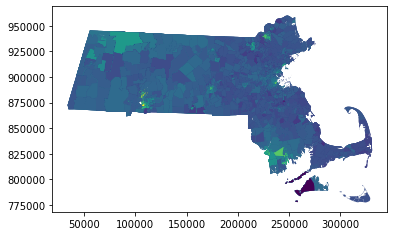

In [78]:
FinalData.plot(column = '% Point Change in Republican Votes')

In [80]:
FinalData.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES_left', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA_left',
       'SHAPE_LEN_left', 'geometry', 'Tract', '% Point Change in LatinX Pop.',
       '% Point Change in Total Pop.', '% Point Puerto Rican Change',
       '% Point Mexican Change', '% Point Cuban Change',
       '% Point Other LatinX Change', 'Total Population 2016',
       'LatinX Population 2016', 'Mexican 2016', 'Puerto Rican 2016',
       'Cuban 2016', 'Other LatinX 2016', 'Total Population 2019',
       'LatinX Population 2019', 'Mexican 2019', 'Puerto Rican 2019',
       'Cuban 2019', 'Other LatinX 2019', 'index_right', 'WP_NAME', 'WARD',
       'PRECINCT', 'DISTRICT', 'POP_2010', 'TOWN', 'TOWN_ID', 'AREA_SQMI',
       'AREA_ACRES_right', 'YEAR', 'SHAPE_AREA_right', 'SHAPE_LEN_right',
       'C

### Split the dataframe into separate dataframes for coloring purposes.

In [56]:
Dpos = FinalData.loc[(FinalData['% Point Change in Democratic Votes'] > FinalData['% Point Change in Republican Votes'])]
Rpos = FinalData.loc[(FinalData['% Point Change in Democratic Votes'] < FinalData['% Point Change in Republican Votes'])]
Tpos = FinalData.loc[(FinalData['% Point Change in LatinX Pop.']>0)]
Tneg = FinalData.loc[(FinalData['% Point Change in LatinX Pop.']<0)]

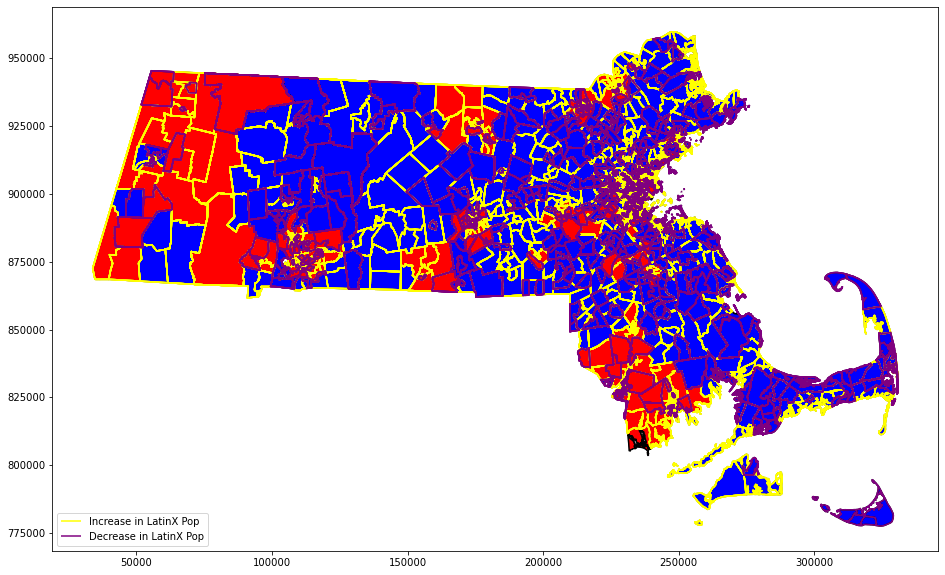

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
ax.set_aspect('equal')
ax = MA_t.boundary.plot(ax = ax, color = 'black')
#FinalData.plot(column='% Change in Republican Votes',ax=ax)
Tpos.boundary.plot(ax = ax, color = 'yellow', marker = '*', markersize = 10, label = 'Increase in LatinX Pop') # increase in latin x
Tneg.boundary.plot(ax = ax, color = 'purple', marker = '*', markersize = 10, label = 'Decrease in LatinX Pop') # decrease in latinx
Dpos.plot(ax = ax,color='blue',label = 'Higher Increase in Democratic Support')
Rpos.plot(ax = ax, color='red', label = 'Higher Increase in Republican Support')
# el.plot(ax = ax, color='grey')
# plt.title("Geospatial Analysis of Massachusetts 2016-2020")
#plt.legend([Tpos,Tneg,Dpos,Rpos],['Increase in LatinX population','Decrease in LatinX population','Increase in Democratic Support','Increase in Republican Support'])
plt.legend(loc = 'lower left')
plt.show()
#plt.savefig('LatinChange+DemRep.png')

In [87]:
FinalData.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES_left', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA_left',
       'SHAPE_LEN_left', 'geometry', 'Tract', '% Point Change in LatinX Pop.',
       '% Point Change in Total Pop.', '% Point Puerto Rican Change',
       '% Point Mexican Change', '% Point Cuban Change',
       '% Point Other LatinX Change', 'Total Population 2016',
       'LatinX Population 2016', 'Mexican 2016', 'Puerto Rican 2016',
       'Cuban 2016', 'Other LatinX 2016', 'Total Population 2019',
       'LatinX Population 2019', 'Mexican 2019', 'Puerto Rican 2019',
       'Cuban 2019', 'Other LatinX 2019', 'index_right', 'WP_NAME', 'WARD',
       'PRECINCT', 'DISTRICT', 'POP_2010', 'TOWN', 'TOWN_ID', 'AREA_SQMI',
       'AREA_ACRES_right', 'YEAR', 'SHAPE_AREA_right', 'SHAPE_LEN_right',
       'C

In [57]:
FinalData.rename(columns = {'Total Votes Cast':'Total Votes Cast 2016'})

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,Ward,Democratic 2016,Republican 2016,Total Votes Cast 2016,Democratic 2020,Republican 2020,Total Votes Cast 2020,% Point Change in Democratic Votes,% Change in Total Votes,% Point Change in Republican Votes
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,818.0,404.0,1334.0,1011.0,464.0,1526.0,0.049323,0.143928,0.001214
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,954.0,433.0,1487.0,1276.0,515.0,1842.0,0.051165,0.238736,-0.011603
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,807.0,271.0,1173.0,926.0,329.0,1301.0,0.023781,0.109122,0.021851
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,980.0,587.0,1687.0,1138.0,613.0,1797.0,0.052365,0.065205,-0.006831
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,2,886.0,483.0,1489.0,1089.0,496.0,1633.0,0.071841,0.096709,-0.020643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,6,773.0,285.0,1175.0,831.0,335.0,1198.0,0.035784,0.019574,0.037080
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,6,366.0,165.0,590.0,375.0,182.0,578.0,0.028450,-0.020339,0.035218
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,8,603.0,226.0,905.0,688.0,308.0,1027.0,0.003614,0.134807,0.050179
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,6,825.0,229.0,1135.0,816.0,331.0,1180.0,-0.035347,0.039648,0.078746


In [58]:
Lneg = points.loc[(points['% Point Change in LatinX Pop.'] < 0)]
Lpos = points.loc[(points['% Point Change in LatinX Pop.'] > 0)]

In [59]:
Lneg = Lneg[['Tract']]
Lpos = Lpos[['Tract']]

Lneg['Tract'] = Lneg['Tract'].astype(float).astype(str)
Lpos['Tract'] = Lpos['Tract'].astype(float).astype(str)

In [60]:
Lpos['Latitude'] = -40.266666
Lpos['Longitude'] = 72.3452

Lneg['Latitude'] = -40.266666
Lneg['Longitude'] = 72.3452

In [61]:
Lpos = gpd.GeoDataFrame(
    Lpos, geometry=gpd.points_from_xy(Lpos.Longitude, Lpos.Latitude))

Lneg = gpd.GeoDataFrame(
    Lneg, geometry=gpd.points_from_xy(Lneg.Longitude, Lneg.Latitude))

In [62]:
LTpos = gpd.pd.merge(MA_t, Lpos,  how='left', left_on=['NAME10'], right_on = ['Tract'])

LTneg = gpd.pd.merge(MA_t, Lneg,  how='left', left_on=['NAME10'], right_on = ['Tract'])

In [63]:
LTpos = LTpos.dropna()

LTneg = LTneg.dropna()


In [64]:
hisp = LTpos[['INTPTLON10','INTPTLAT10']]
hisn = LTneg[['INTPTLON10','INTPTLAT10']]

In [65]:
hispg = gpd.GeoDataFrame(
    hisp, geometry=gpd.points_from_xy(hisp.INTPTLON10, hisp.INTPTLAT10))
hisng = gpd.GeoDataFrame(
    hisn, geometry=gpd.points_from_xy(hisn.INTPTLON10, hisn.INTPTLAT10))

In [66]:
LTpos.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry_x', 'Tract', 'Latitude', 'Longitude',
       'geometry_y'],
      dtype='object')

In [67]:
LTposg = LTpos[['geometry_x']]
LTnegg = LTneg[['geometry_x']]

In [68]:
from shapely.geometry import Polygon, LineString, Point

In [69]:
LTpos=LTpos.drop(columns = ['Latitude', 'Longitude','geometry_y'])
LTpos=LTpos.rename(columns = {'geometry_x':'geometry'})
LTneg=LTneg.drop(columns = ['Latitude', 'Longitude','geometry_y'])
LTneg=LTneg.rename(columns = {'geometry_x':'geometry'})

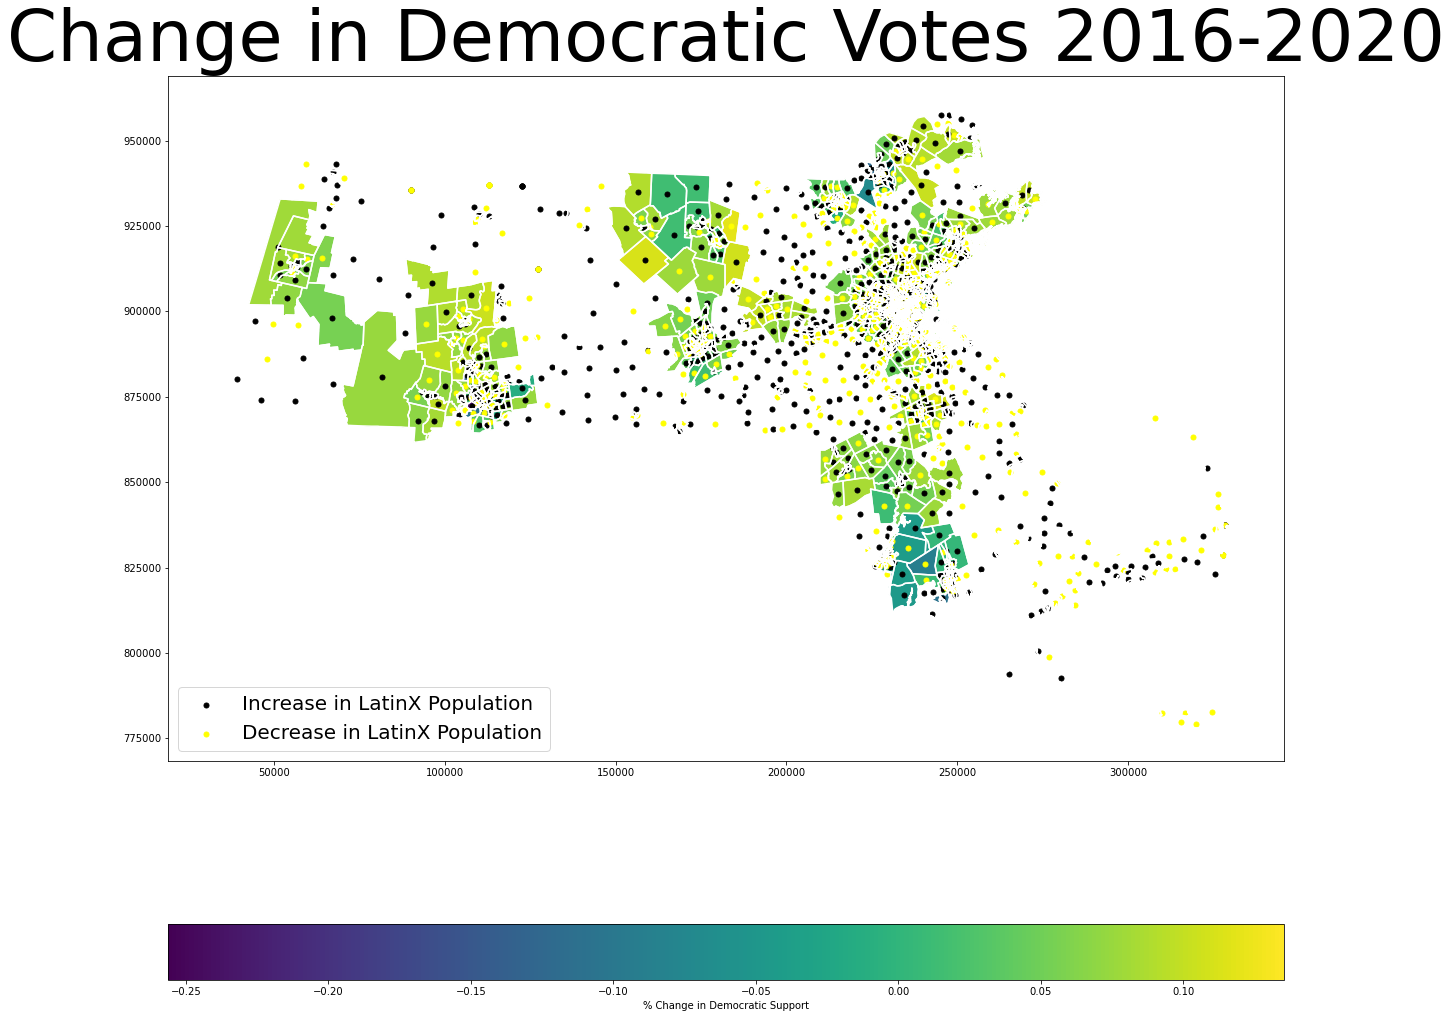

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,20))
ax.set_aspect('equal')
ax = MA_t.boundary.plot(ax = ax, color = 'white')
plt.title('Change in Democratic Votes 2016-2020', fontsize = 72)
FinalData.plot(column='% Point Change in Democratic Votes',ax=ax,legend=True,legend_kwds={'label': "% Change in Democratic Support", 'orientation': "horizontal"})
LTpos.centroid.plot(ax =ax, color = 'black', marker = 'o', markersize =25, label = 'Increase in LatinX Population')
LTneg.centroid.plot(ax = ax, color = 'yellow', marker = 'o', markersize = 25, label = 'Decrease in LatinX Population')
plt.legend(loc = 'lower left',prop={'size': 20})

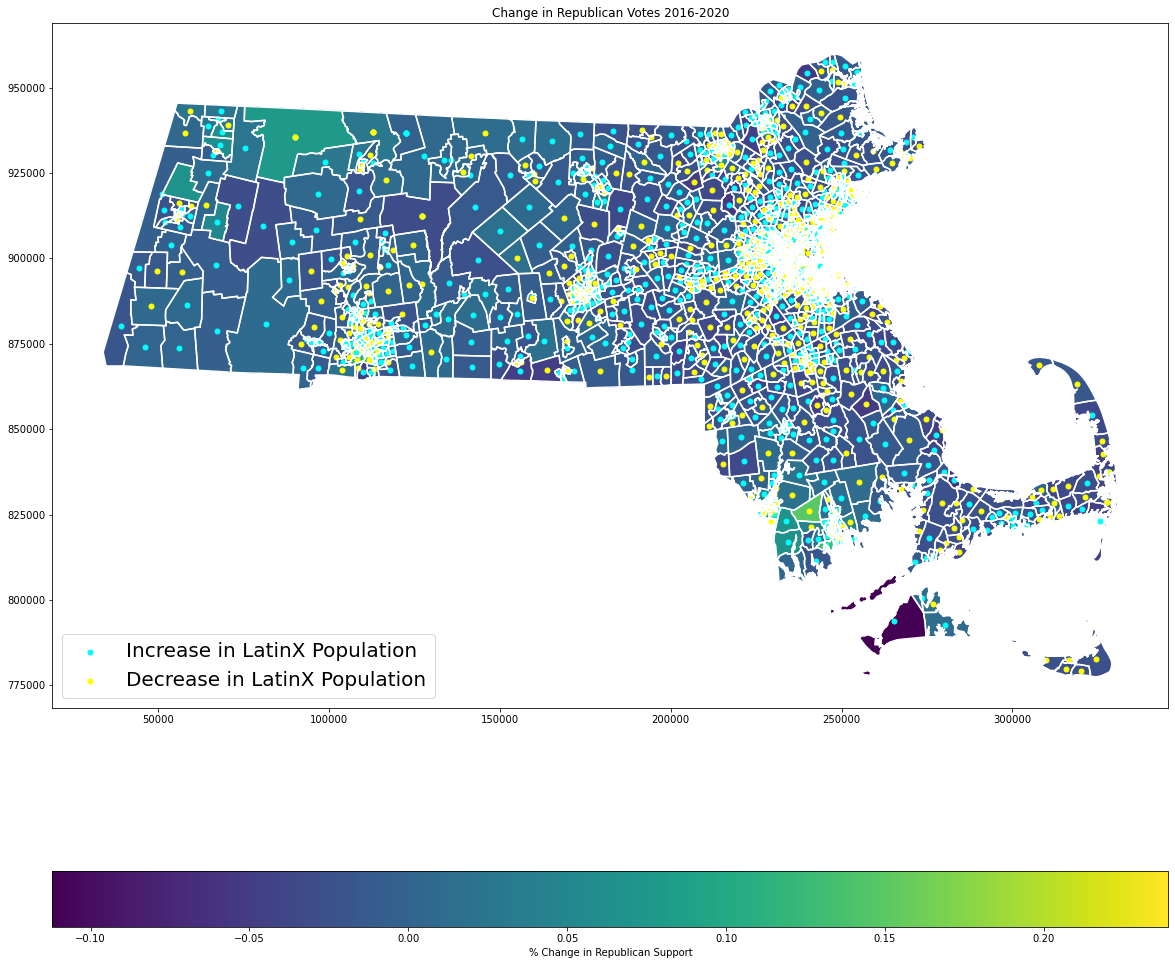

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,20))
ax.set_aspect('equal')
ax = MA_t.boundary.plot(ax = ax, color = 'white')
plt.title('Change in Republican Votes 2016-2020')
FinalData.plot(column='% Point Change in Republican Votes',ax=ax,legend=True,legend_kwds={'label': "% Change in Republican Support", 'orientation': "horizontal"})
LTpos.centroid.plot(ax =ax, color = 'cyan', marker = 'o', markersize =25, label = 'Increase in LatinX Population')
LTneg.centroid.plot(ax = ax, color = 'yellow', marker = 'o', markersize = 25, label = 'Decrease in LatinX Population')
plt.legend(loc = 'lower left',prop={'size': 20})

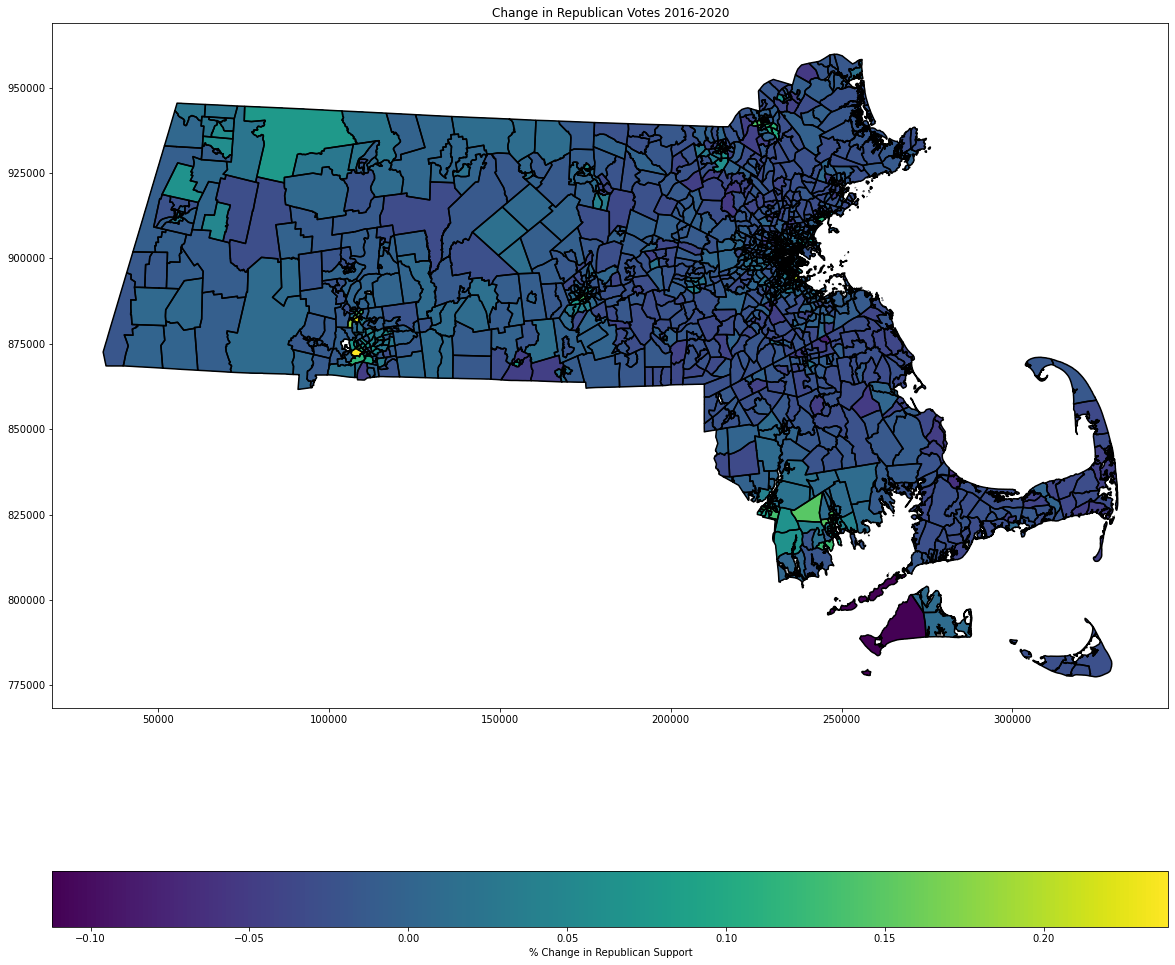

In [103]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,20))
ax.set_aspect('equal')
ax = MA_t.boundary.plot(ax = ax, color = 'black')
plt.title('Change in Republican Votes 2016-2020')
FinalData.plot(column='% Point Change in Republican Votes',ax=ax,legend=True,legend_kwds={'label': "% Change in Republican Support", 'orientation': "horizontal"})

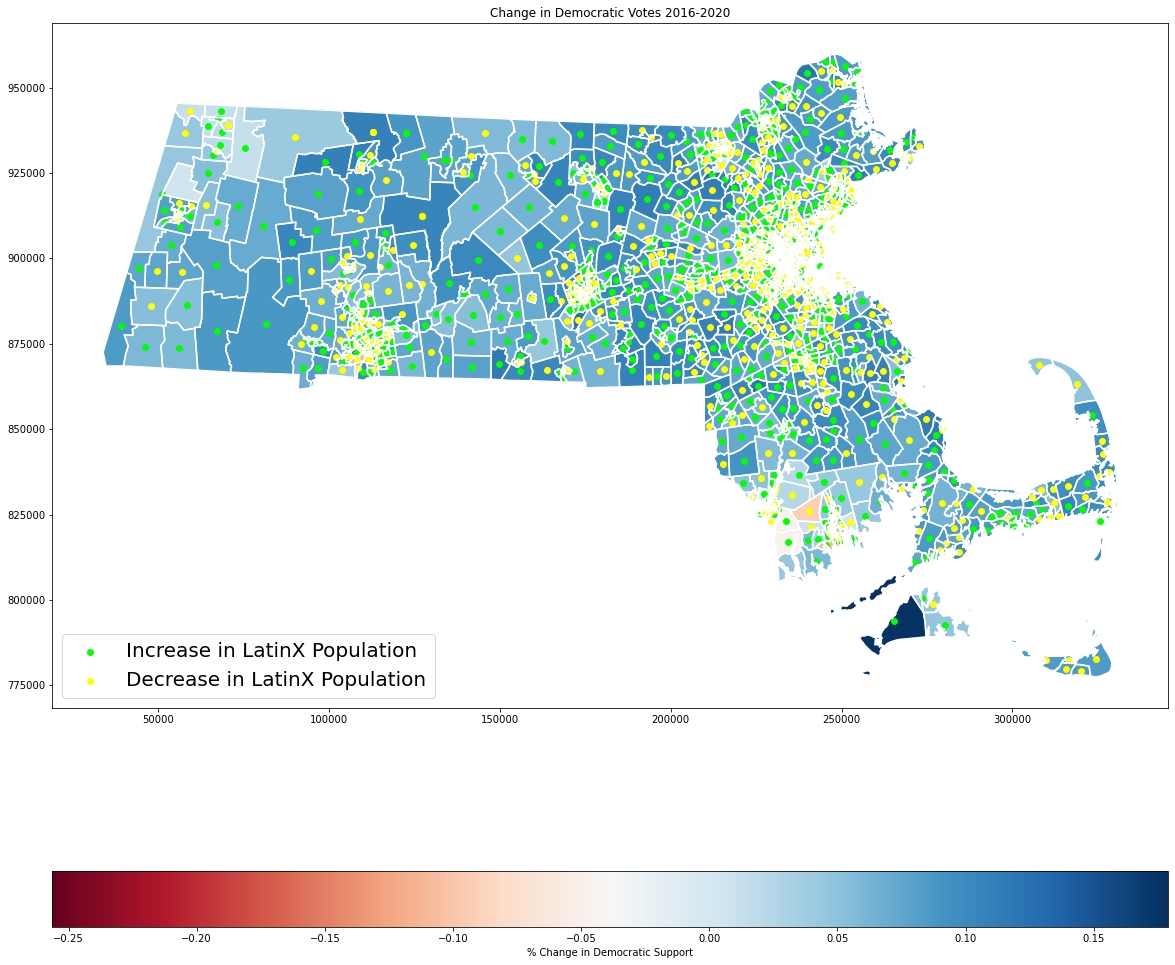

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,20))
ax.set_aspect('equal')
ax = MA_t.boundary.plot(ax = ax, color = 'white')
plt.title('Change in Democratic Votes 2016-2020')
FinalData.plot(column='% Point Change in Democratic Votes',cmap = 'RdBu',ax=ax,legend=True,legend_kwds={'label': "% Change in Democratic Support", 'orientation': "horizontal"})
LTpos.centroid.plot(ax =ax, color = 'lime', marker = 'o', markersize =35, label = 'Increase in LatinX Population')
LTneg.centroid.plot(ax = ax, color = 'yellow', marker = 'o', markersize = 35, label = 'Decrease in LatinX Population')
plt.legend(loc = 'lower left',prop={'size': 20})

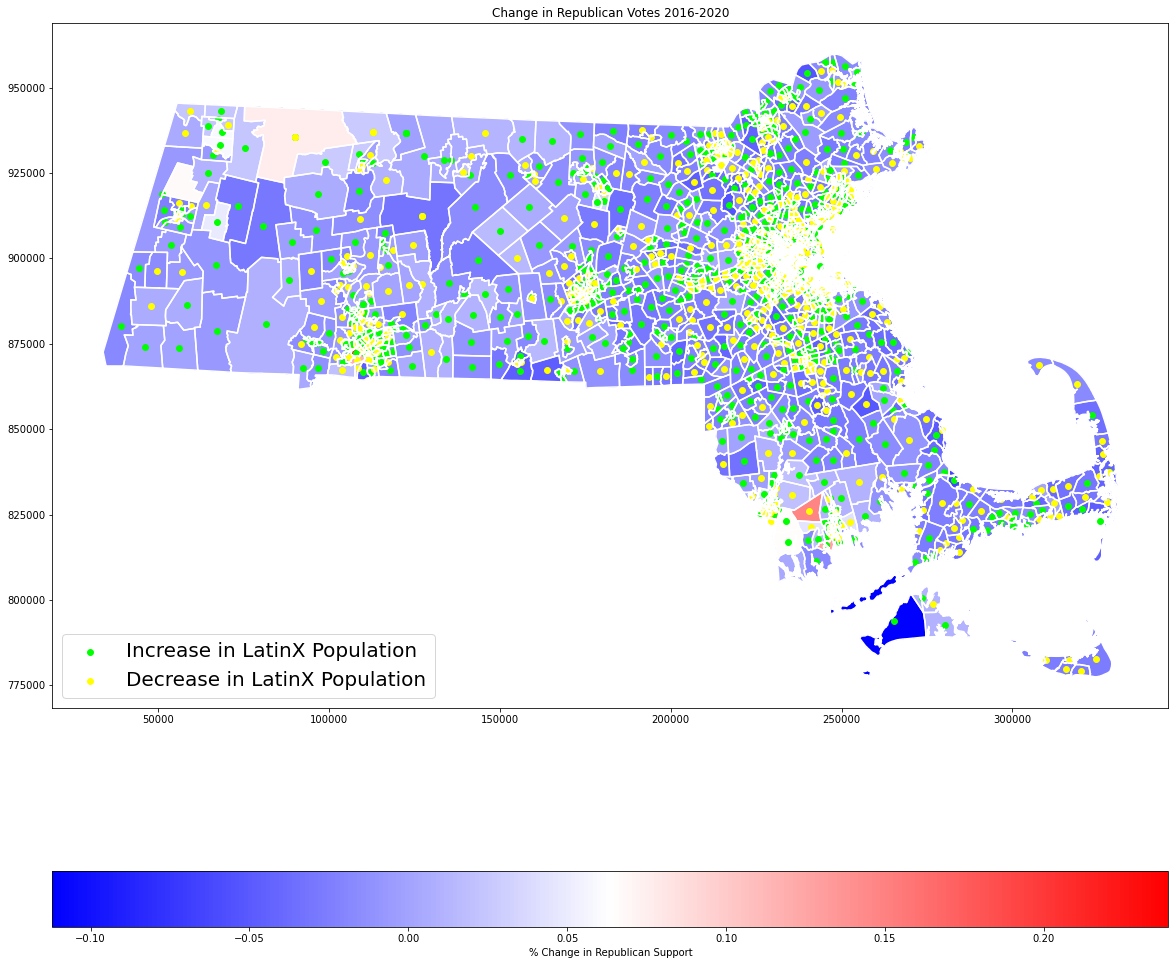

In [106]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,20))
ax.set_aspect('equal')
ax = MA_t.boundary.plot(ax = ax, color = 'white')
plt.title('Change in Republican Votes 2016-2020')
FinalData.plot(column='% Point Change in Republican Votes',cmap='bwr',ax=ax,legend=True,legend_kwds={'label': "% Change in Republican Support", 'orientation': "horizontal"})
LTpos.centroid.plot(ax =ax, color = 'lime', marker = 'o', markersize =35, label = 'Increase in LatinX Population')
LTneg.centroid.plot(ax = ax, color = 'yellow', marker = 'o', markersize = 35, label = 'Decrease in LatinX Population')
plt.legend(loc = 'lower left',prop={'size': 20})